In [18]:
import numpy as np
# thư viện này để hiển thị các tấm ảnh
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
# để chọn ngẫu nhiên các tấm ảnh
import random
import os
# để load dữ liệu trong tập mẫu
from keras.datasets import mnist
from keras.models import load_model
from matplotlib import image
# các hàm sau để xây dựng mô hình mạng neural
# thêm 1 lớp, thêm hàm kích hoạt activation
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Activation

In [19]:
# dữ liệu trong tập data mnist là 60000 tấm ảnh trắng đen có kích thước là 28X28 pixel
# mỗi pixel có giá trị từ 0-255, 0 là màu đen và 255 là màu trắng sáng nhất
# các giá trị càng gần với 255 thì càng sáng
# xem shape của tập train, sau khi xem thì ta sẽ thấy thông tin x_train shape (60000, 28, 28)
# nghĩa là có 60000 tấm ảnh trong tập train, mỗi tấm ảnh có kích thước 28*28
(x_train,y_train),(x_test,y_test)=mnist.load_data()

Xem shape của tập train:

In [20]:
print("x_train shape",x_train.shape)

x_train shape (60000, 28, 28)


Muốn hiển thị ngẫu nhiên các tấm ảnh trong tập train

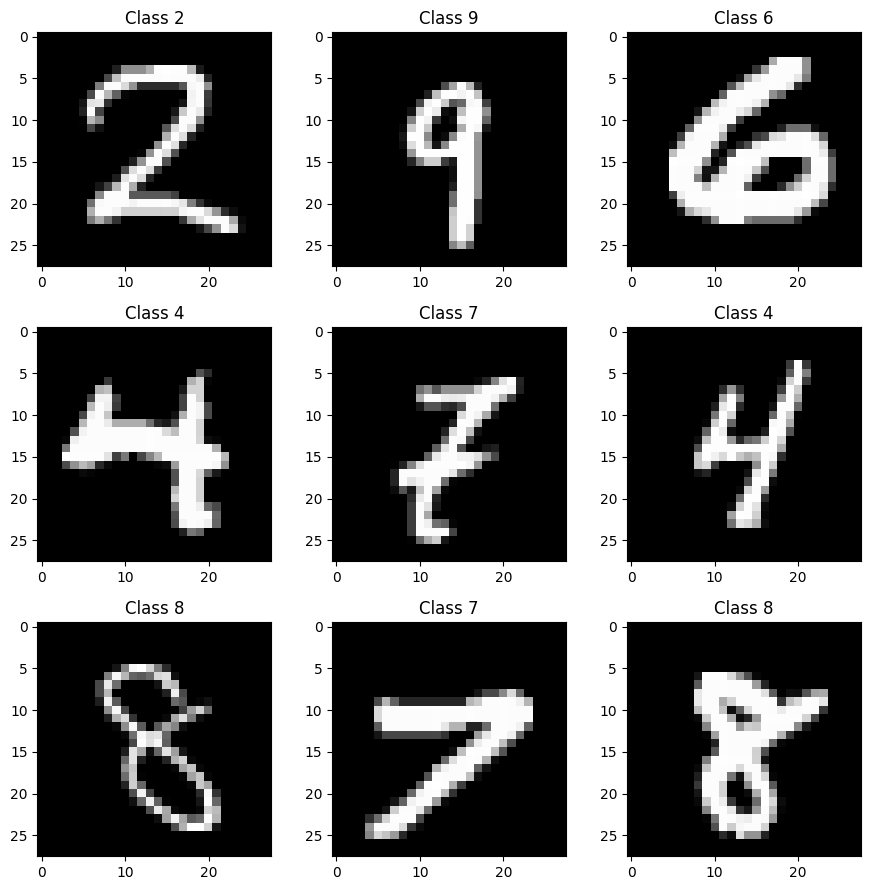

In [21]:
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
 plt.subplot(3,3,i+1)
 num=random.randint(0,len(x_train))
 plt.imshow(x_train[num],cmap='gray',interpolation=None)
 plt.title('Class {}'.format(y_train[num]))
plt.tight_layout()

Thay đổi kích thước đầu vào chuyển đầu vào của mỗi tấm ảnh về dạng vector.

In [22]:
x_train=x_train.reshape(60000,784)
x_train=x_train.astype('float32')
# chuẩn hóa dữ liệu nằm trong khoảng 0-1 nên chia cho 255
x_train/=255

Sau khi chuẩn hóa xong, muốn xem lại tập train thì cùng hàm print

In [23]:
print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Tương tự đối với tập train, tập test chỉ gồm 10000 tấm ảnh

In [24]:
x_test=x_test.reshape(10000,784)
x_test=x_test.astype('float32')
x_test/=255

Sau khi chuẩn hóa xong muốn xem lại tập test thì cùng hàm print

In [25]:
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


2. Quá trình học và dự báo:

In [26]:
nb_class=10
y_train=to_categorical(y_train,nb_class)
y_test=to_categorical(y_test,nb_class)


Thêm các nút và các hàm vào mạng neural, huấn luyện mạng neural

In [27]:
model= Sequential()
#add vào 1 lớp input,có 10 neural(10 neural) và mỗi neural có 784 input
model.add(Dense(10,input_shape=(784,)))
model.add(Activation('relu'))
# add lớp hidden sẽ tự động lấy đầu vào của lớp đầu, giá trị hiden có thểthay đổi
model.add(Dense(40))
model.add(Activation('relu'))
# add vào lớp đầu ra, bắt buộc là 10 vì số từ 0->9 là 10 số
model.add(Dense(10))
# dùng hàm softmax vì đầu ra là 10 lớp (nhận dạng số 0-9)
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics
=['accuracy'])
#mỗi lần lấy 128 tấm ảnh để train
history=model.fit (x_train, y_train, batch_size = 128, epochs = 5,verbose
= 2,validation_data = ( x_test, y_test ))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
 dense_4 (Dense)             (None, 40)                440       
                                                                 
 activation_4 (Activation)   (None, 40)                0         
                                                                 
 dense_5 (Dense)             (None, 10)                410       
                                                                 
 activation_5 (Activation)   (None, 10)                0         
                                                                 
Total params: 8700 (33.98 KB)
Trainable params: 8700 (

Lưu lại mô hình để lần sau sử dụng, khỏi phải huấn luyện lại:

In [28]:
save_dir = "/ results /"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save (model_path)
print( 'Saved trained model at %s ' % model_path )


Saved trained model at / results /keras_mnist.h5 


Vẽ đồ thị đánh giá độ chính xác của mô hình

313/313 - 1s - loss: 0.2179 - accuracy: 0.9360 - 675ms/epoch - 2ms/step
Test Loss 0.21787041425704956
Test Accuracy 0.9359999895095825


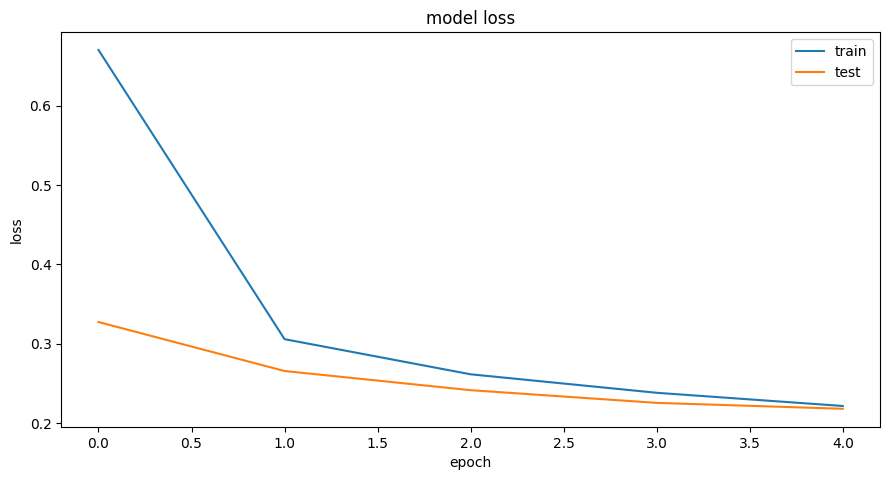

In [29]:
plt.subplot (2,1,2)
plt.plot( history.history ['loss'])
plt.plot( history.history['val_loss'])
plt.title('model loss' )
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.tight_layout ()
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate( x_test, y_test, verbose = 2 )
print( "Test Loss" , loss_and_metrics [0])
print( "Test Accuracy" , loss_and_metrics[1])


Áp dụng mô hình để nhận dạng 1 tấm ảnh đưa vào:

In [34]:
#Hàm này được viết ngoài hàm main
def load_image(filename):
    # load tấm ảnh lên
    img = load_img(filename, grayscale=True, target_size=(28, 28))
    # chuyển về dạng vector
    img=img_to_array(img)
    # reshape into a single sample with 1 channel
    img=img.reshape(1,784)
    img=img.astype('float32')
    #chuẩn hóa dữ liệu về 0-1
    img=img/255.0
    return img
#load tấm ảnh cần dự báo
image_test = load_image('so2.JPG')
#dự báo tấm ảnh này là số mấy
digit = mnist_model.predict(image_test)
print('Du bao day la so:',digit[0].argmax())

1/1 [==============================] - 0s 21ms/step
Du bao day la so: 2


313/313 [==============================] - 2s 5ms/step


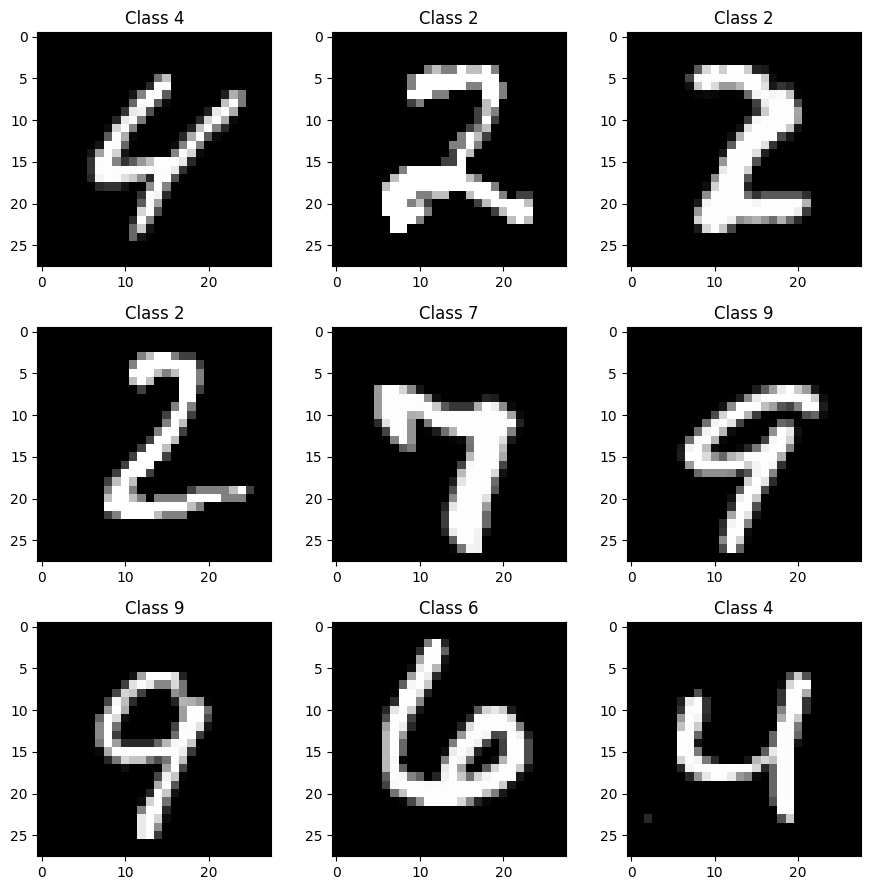

In [37]:
predicted_classes=mnist_model.predict(x_test)
plt.rcParams['figure.figsize']=(9,9)
for i in range(9):
  plt.subplot(3,3,i+1)
  num=random.randint(0,len(x_test))
  plt.imshow(x_test[num].reshape(28,28),cmap='gray',interpolation=None)
  plt.title('Class {}'.format(predicted_classes[num].argmax()))
plt.tight_layout()